In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

['train_set']


In [2]:
train_data=pd.read_csv("../input/train_set/train_set.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = train_data
train = train_data.replace('?', np.NaN)

In [4]:
train.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,F,NaN,NaN,C,NaN,C,A,B,F,D,4,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,A,A,A,E,C,A,B,A,B,D,5,0.217951,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,NaN,A,A,A,C,C,A,B,A,E,D,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,NaN,A,A,A,C,C,A,B,B,B,B,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,B,NaN,NaN,D,NaN,A,B,A,B,B,5,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [5]:
train.isnull().sum()

Row_ID                  0
Household_ID            0
Vehicle                 0
Calendar_Year           0
Model_Year              0
Blind_Make           8431
Blind_Model          8431
Blind_Submodel       8431
Cat1                25981
Cat2              4874164
Cat3                 3999
Cat4              5631649
Cat5              5637321
Cat6                25981
Cat7              7167634
Cat8                 3364
Cat9                    0
Cat10                3917
Cat11               31469
Cat12               28882
OrdCat               7546
Var1                    0
Var2                    0
Var3                    0
Var4                    0
Var5                    0
Var6                    0
Var7                    0
Var8                    0
NVCat                   0
NVVar1                  0
NVVar2                  0
NVVar3                  0
NVVar4                  0
Claim_Amount            0
dtype: int64

In [6]:
train.isnull().sum()[train.isnull().sum() !=0]

Blind_Make           8431
Blind_Model          8431
Blind_Submodel       8431
Cat1                25981
Cat2              4874164
Cat3                 3999
Cat4              5631649
Cat5              5637321
Cat6                25981
Cat7              7167634
Cat8                 3364
Cat10                3917
Cat11               31469
Cat12               28882
OrdCat               7546
dtype: int64

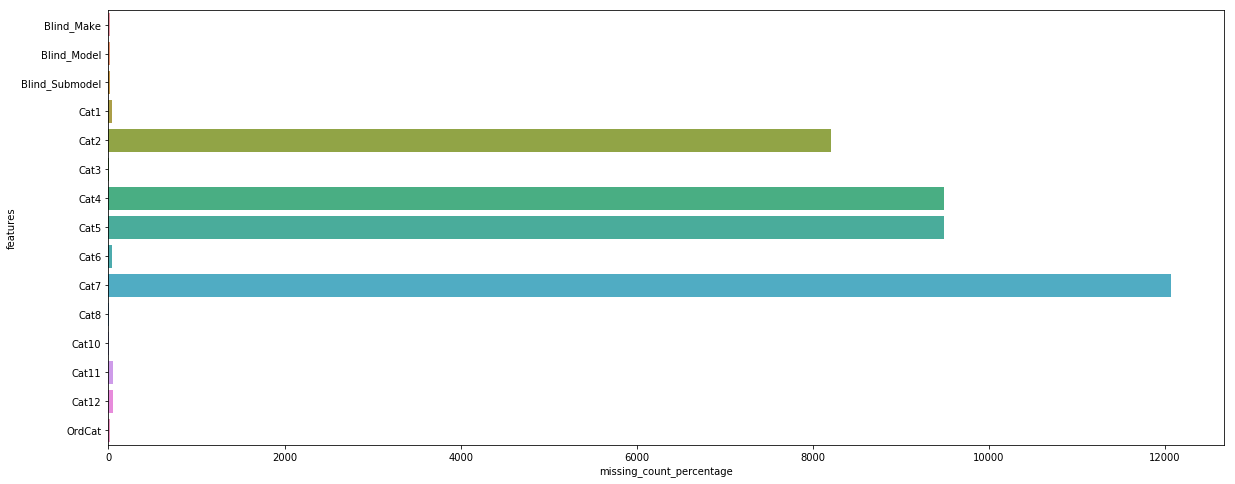

In [7]:
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/59381)*100
plt.figure(figsize=(20,8))
sns.barplot(y=train_missing['features'],x=train_missing['missing_count_percentage'])

In [8]:
train_missing

,features,missing_count,missing_count_percentage
0,Blind_Make,8431,14.198144
1,Blind_Model,8431,14.198144
2,Blind_Submodel,8431,14.198144
3,Cat1,25981,43.753052
4,Cat2,4874164,8208.288847
5,Cat3,3999,6.734477
6,Cat4,5631649,9483.924151
7,Cat5,5637321,9493.476028
8,Cat6,25981,43.753052
9,Cat7,7167634,12070.584867


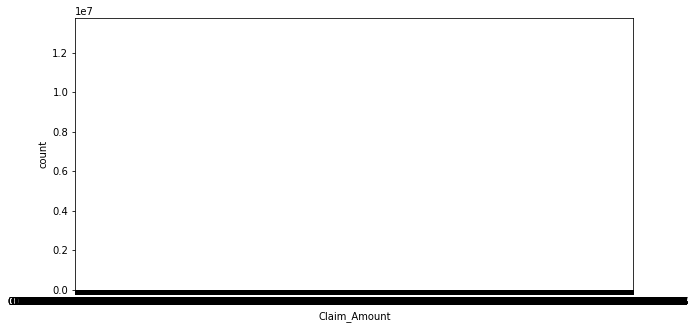

In [9]:
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Claim_Amount',data=train)